In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import logging
log = logging.getLogger("ps")
log.setLevel(logging.DEBUG)

In [242]:
font = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 16} 
import matplotlib
matplotlib.rc('font', **font) 
import matplotlib.pyplot as plt
import pylab
import math
import sys
import numpy as np
from scipy import ndimage
from astropy.cosmology import FlatLambdaCDM

#np.set_printoptions(threshold=sys.maxsize)
#from power_spectrum import Lens
from power_spectrum_meneghetti import Lens

In [243]:
cosmo_flat = FlatLambdaCDM(H0=70.0, Om0=0.3, Tcmb0=2.7255)
z=0.308
scale = cosmo_flat.kpc_proper_per_arcmin(z)

In [244]:
abell = Lens('data/abell2744_mass_density.fits')
nr, kbin_centers, power = abell.compute_power_spectrum()
theta_bin_centers = 1.0/kbin_centers
sig_power = power/(np.sqrt(0.5*nr))

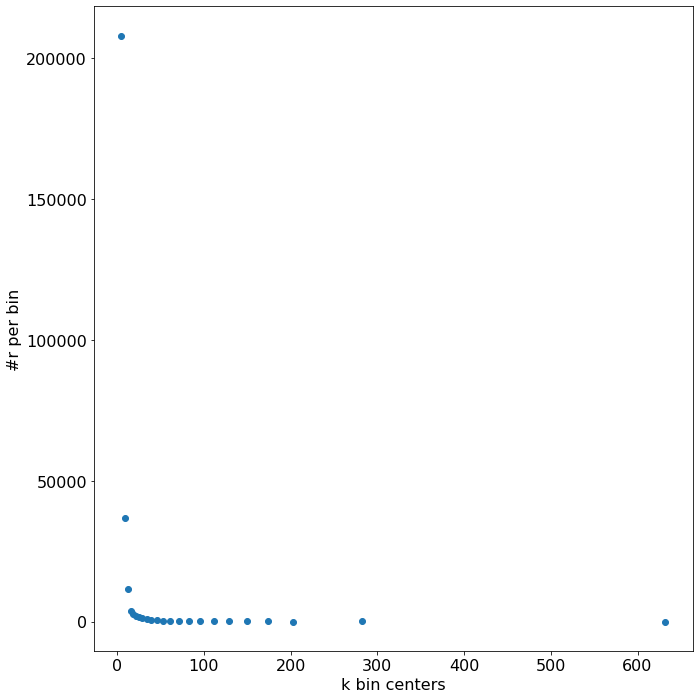

In [245]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(theta_bin_centers, nr, 'o')
ax.set_xlabel(r'k bin centers')
ax.set_ylabel(r'#r per bin')
plt.tight_layout()
#plt.savefig('abell2744_power_theta.jpeg')
pylab.show()

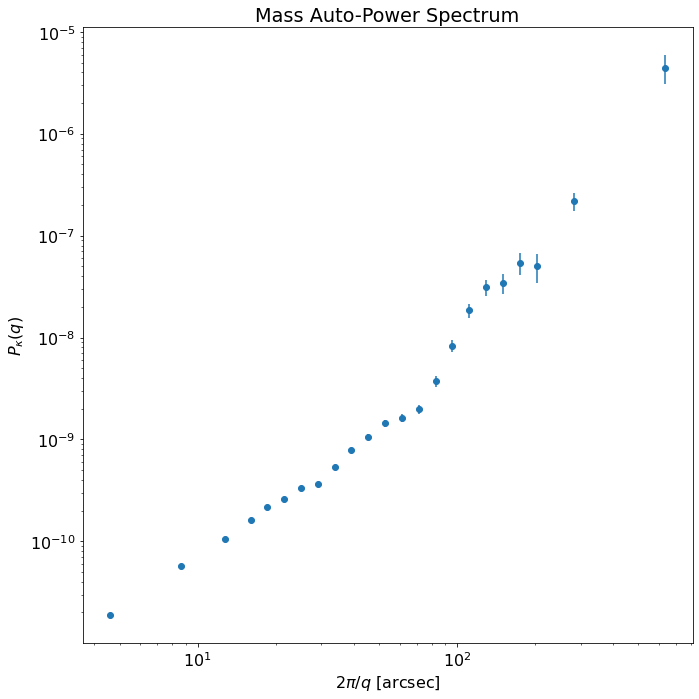

In [246]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.errorbar(theta_bin_centers, power, yerr=sig_power, color='C0', fmt='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$2\pi/q$ [arcsec]')
ax.set_ylabel(r'$P_\kappa(q) $')
ax.title.set_text('Mass Auto-Power Spectrum')
plt.tight_layout()
#plt.savefig('output/abell2744_power_meneghetti.jpeg')
plt.show()

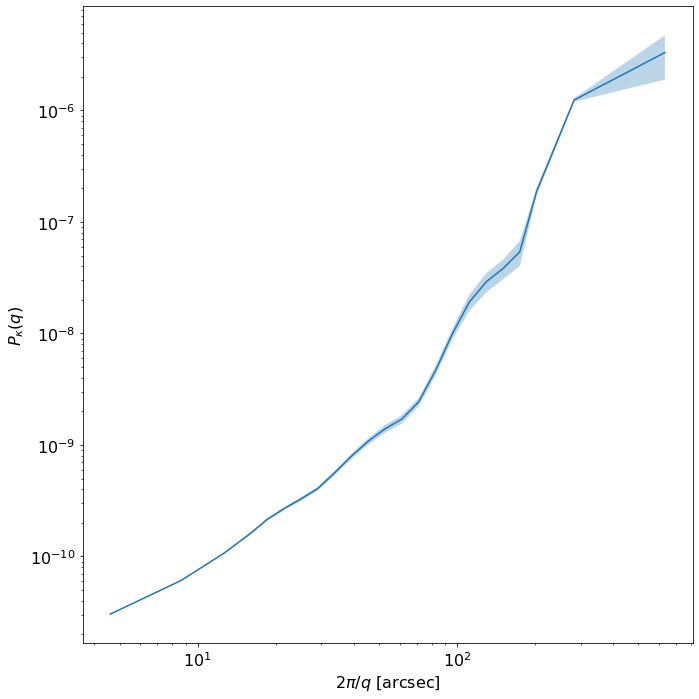

In [247]:
power_smooth = ndimage.gaussian_filter1d(power, sigma=0.8)
y_plus = power_smooth + sig_power
y_minus = power_smooth - sig_power

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(theta_bin_centers, power_smooth, color='C0')
ax.fill_between(theta_bin_centers, y_plus, y_minus, alpha=0.3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$2\pi/q$ [arcsec]')
ax.set_ylabel(r'$P_\kappa(q) $')
plt.tight_layout()
#plt.savefig('output/abell2744_power_smooth_meneghetti.jpeg')
plt.show()


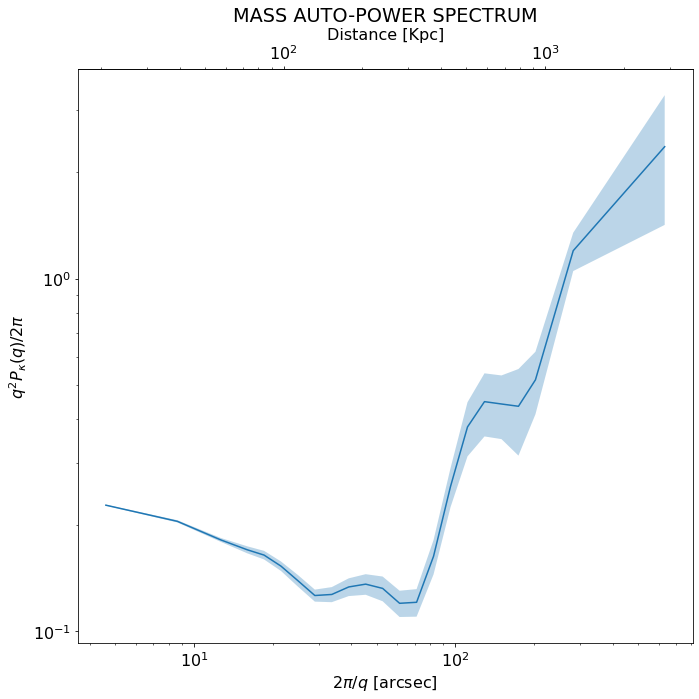

In [248]:
arcsec2rad = math.pi/(180.0*3600.0)

def arcsec2dist(theta_ang):
    return (scale.value/60)*theta_ang

def dist2arcsec(theta_ang):
    return (theta_ang*60/(scale.value))

qbin_centers = 2.0*np.pi*kbin_centers
qbin_centers = qbin_centers/arcsec2rad
power_q = power*qbin_centers**2/(2.0*math.pi) 
sig_q_power = sig_power*qbin_centers**2/(2.0*math.pi)

power_q_smooth = ndimage.gaussian_filter1d(power_q, sigma=0.8)
y_plus = power_q_smooth + sig_q_power
y_minus = power_q_smooth - sig_q_power

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(theta_bin_centers, power_q_smooth, color='C0')
ax.fill_between(theta_bin_centers, y_plus, y_minus, alpha=0.3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$2\pi/q$ [arcsec]')
ax.set_ylabel(r'$q^2 P_\kappa(q) / 2\pi$')
secax = ax.secondary_xaxis('top', functions=(arcsec2dist,dist2arcsec))
secax.set_xlabel('Distance [Kpc]')
ax.title.set_text('MASS AUTO-POWER SPECTRUM')
fig.tight_layout()
fig.savefig('output/abell2744_power_q2_smooth_meneghetti_.jpeg')
plt.show()